# Automatic Teller Machine Example

In [1]:
from maat.systemdefinition import *

## ATM0 : First simple machine
* Input messages deposit?d and amount?a represent respectively user actions to deposit money amount d and to retrieve money amount a
* Output message cash!c represents the fact that ATM gives c to the user

In [2]:
ATMSystem_0 = System("ATMSystem_0")
ATM0 = ATMSystem_0.addStateMachine("ATM0")

State variables and ports

In [3]:
v_m = ATM0.addIntVar("m")
v_a = ATM0.addIntVar("a")

p_deposit = ATM0.addInPort('deposit', params=['int'])
p_amount = ATM0.addInPort('amount', params=['int'])
p_cash = ATM0.addOutPort('cash', params=['int'])

Add states to the state machines

In [4]:
s_init = ATM0.addInitialState("Init")
s_idle = ATM0.addState("Idle")
s_wr = ATM0.addState("WR")

t_initialization = s_init.addTransition("initialization", s_idle)
t_initialization.addReceive(p_deposit, ["m"]);

#idle: ATM is waiting for a user input

t_deposit = s_idle.addTransition("deposit", s_idle)
t_deposit.addReceive(p_deposit, ["a"]);
t_deposit.addStatement("m := m+a")

t_retrieve = s_idle.addTransition("retrieve", s_wr)
t_retrieve.addReceive(p_amount, ["a"]);

t_givecash = s_wr.addTransition("givecash", s_idle)
t_givecash.addSend(p_cash, ["a"])
t_givecash.addStatement("m:= m-a")


True

Connect ports together

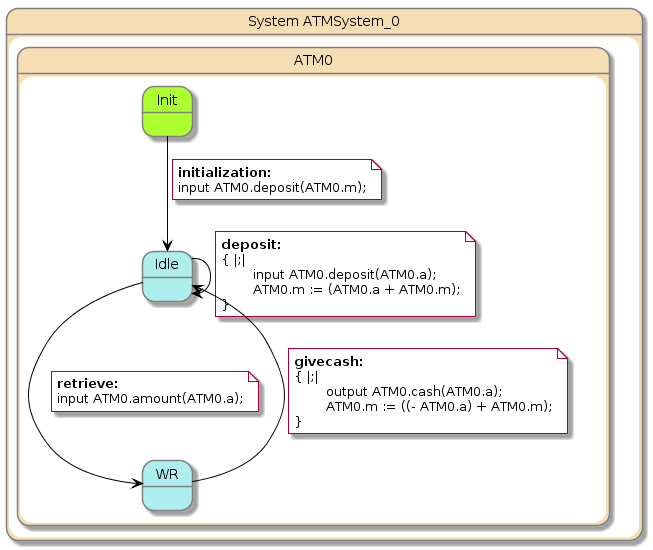

In [5]:
ATMSystem_0.connectEnv(p_deposit)
ATMSystem_0.connectEnv(p_amount)
ATMSystem_0.connectEnv(p_cash)

show(ATMSystem_0)

## ATM1: a model with guards
Guards allow to enrich the model with conditions on value received from the user

In [6]:
ATMSystem_1 = System("ATMSystem_1")
ATM1 = ATMSystem_1.addStateMachine("ATM1")

In [7]:
v_m = ATM1.addIntVar("m")
v_a = ATM1.addIntVar("a")

p_deposit = ATM1.addInPort('deposit', params=['int'])
p_amount = ATM1.addInPort('amount', params=['int'])
p_cash = ATM1.addOutPort('cash', params=['int'])

In [8]:
s_init = ATM1.addInitialState("Init")
s_idle = ATM1.addState("Idle")
s_wr = ATM1.addState("WR")

t_initialization = s_init.addTransition("initialization", s_idle)
t_initialization.addReceive(p_deposit, ["m"]);

#idle: ATM is waiting for a user input

t_deposit = s_idle.addTransition("deposit", s_idle)
t_deposit.addReceive(p_deposit, ["a"]);
t_deposit.addStatement("m := m+a")

t_retrieve = s_idle.addTransition("retrieve", s_wr)
t_retrieve.addReceive(p_amount, ["a"]);

t_givecash = s_wr.addTransition("givecash", s_idle)
t_givecash.addSend(p_cash, ["a"])
t_givecash.addGuard("0<a && a<=m")
t_givecash.addStatement("m:= m-a")

True

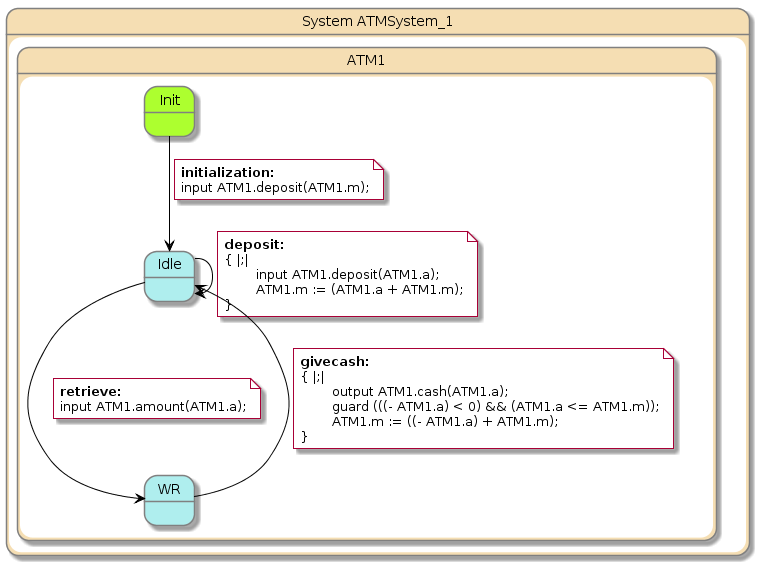

In [9]:
ATMSystem_1.connectEnv(p_deposit)
ATMSystem_1.connectEnv(p_amount)
ATMSystem_1.connectEnv(p_cash)

show(ATMSystem_1)

## Analysis

### Configuration

In [10]:
from maat.configuration import *

In [11]:
c = Configuration()
c.setWorkspace(rootdir='./', outdir='./')
c.setAnalysisType('transition_coverage',slice=True)
c.setStrategy('BFS')
c.setSolver('Z3')
c.setVerbosity('SILENT')
c.setDebugLevel('HIGH')
c.setLogFilename('monLog.log')
c.setDebugFilename('myDebug.dbg')
c.setDebugFlag('GOD_MODE')
c.check()

print(c)

Configuration check:  all ok.
workflow {
        workspace [
                root = "./"
                launch = "./"
                output = "./"
        ]
        director coverage#transition {
                manifest [
                        autoconf = true
                        autostart = true
                ]
                project [
                        source = "."
                ]
                supervisor {
                        limit [
                                step = 42
                        ]
                        queue [
                                strategy = 'BREADTH_FIRST_SEARCH'
                        ]
                        redundancy [
                                loop#detection#trivial = false
                        ]
                }
                worker [
                        coverage#transition {
                                property [
                                        stop = true
                                

### Exploration (transition coverage)

In [12]:
from maat.designvalidation import *

In [13]:
engine = Engine(c)
ok = engine.setSystem(ATMSystem_1)
result = engine.start()
print(result.report())

Configuration successfully loaded
System successfully loaded.
REPORT
	SUPERVISOR  PROCESSOR
	TRANSITION COVERAGE PROCESSOR
		All the << 4 >> transitions are covered !
		Number of nodes cut back: 2



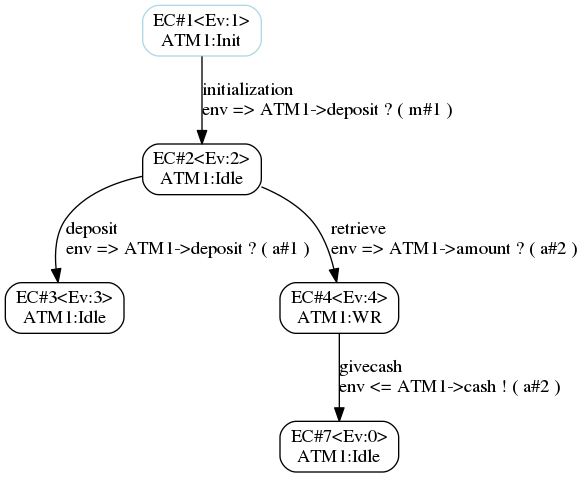

In [14]:
show(result)

### Sequence Diagram of Execution Trace

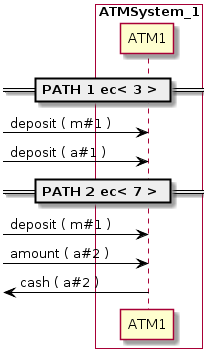

In [15]:
showSD(result)